# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Define unit of measure
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | nova olimpia
Processing Record 4 of Set 1 | palikir - national government center
Processing Record 5 of Set 1 | kuraymah
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | happy valley-goose bay
Processing Record 8 of Set 1 | turinskaya sloboda
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | acarau
Processing Record 11 of Set 1 | udachny
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | macomb
Processing Record 16 of Set 1 | plover
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | westport
Processing Record 20 of Set 1 | patong
Processing Record 21 of Set 1 | san patricio
Processing Record 2

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hamilton,39.1834,-84.5333,303.50,60,0,2.57,US,1721147410
1,punta arenas,-53.1500,-70.9167,279.21,75,40,4.12,CL,1721147909
2,nova olimpia,-14.7972,-57.2881,304.34,27,0,2.00,BR,1721147911
3,palikir - national government center,6.9248,158.1611,298.56,94,100,2.06,FM,1721147912
4,kuraymah,18.5500,31.8500,312.13,11,100,1.79,SD,1721147913


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,303.50,60,0,2.57,US,1721147410
1,punta arenas,-53.1500,-70.9167,279.21,75,40,4.12,CL,1721147909
2,nova olimpia,-14.7972,-57.2881,304.34,27,0,2.00,BR,1721147911
3,palikir - national government center,6.9248,158.1611,298.56,94,100,2.06,FM,1721147912
4,kuraymah,18.5500,31.8500,312.13,11,100,1.79,SD,1721147913


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

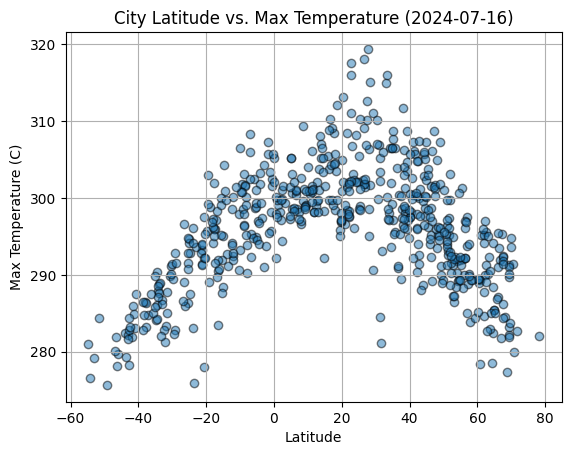

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
Fig1 = plt.scatter(latitude, temperature, edgecolors="black", linewidths=1, alpha=0.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

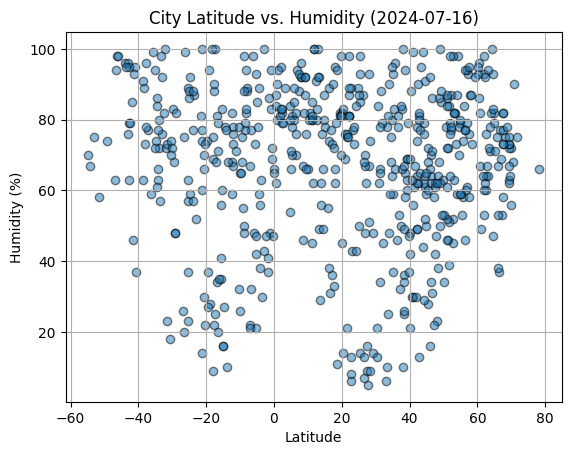

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
Fig2 = plt.scatter(latitude, humidity, edgecolors="black", linewidths=1, alpha=0.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

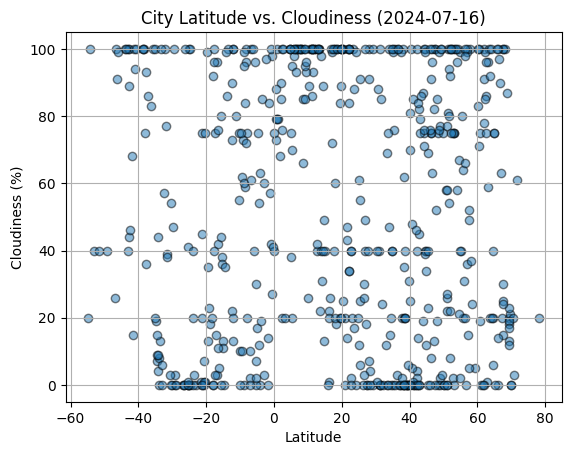

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
Fig3 = plt.scatter(latitude, cloudiness, edgecolors="black", linewidths=1, alpha=0.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

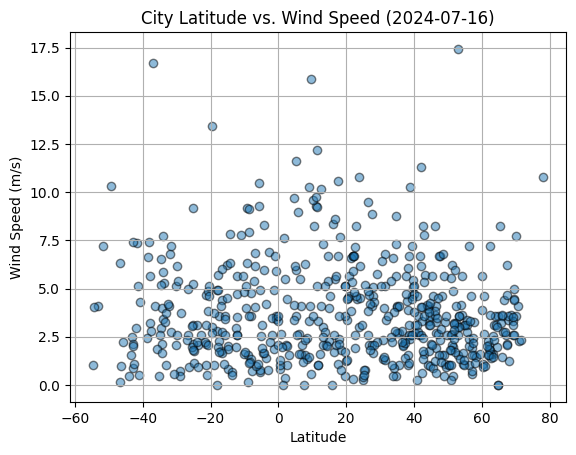

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind = city_data_df["Wind Speed"]
Fig4 = plt.scatter(latitude, wind, edgecolors="black", linewidths=1, alpha=0.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, title, x_label, y_label, text_coord):

    # Calculate values for linear regression equation
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate y-values for the linear regression line
    regress_values = x_values * slope + intercept

    # Formulate the linear regression equation for display
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot including the linear regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # Add text annotation for line equation
    plt.annotate(line_eq, text_coord, fontsize=15, color='red')

    # Add chart title and labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Print the r-value
    print(f"The r-value is: {r_value}")

    # Show the chart
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,303.50,60,0,2.57,US,1721147410
3,palikir - national government center,6.9248,158.1611,298.56,94,100,2.06,FM,1721147912
4,kuraymah,18.5500,31.8500,312.13,11,100,1.79,SD,1721147913
5,hasaki,35.7333,140.8333,295.53,96,100,2.67,JP,1721147914
6,happy valley-goose bay,53.3168,-60.3315,292.32,82,100,3.60,CA,1721147915


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,punta arenas,-53.1500,-70.9167,279.21,75,40,4.12,CL,1721147909
2,nova olimpia,-14.7972,-57.2881,304.34,27,0,2.00,BR,1721147911
9,acarau,-2.8856,-40.1200,304.25,43,3,6.92,BR,1721147918
11,waitangi,-43.9535,-176.5597,282.49,96,100,0.45,NZ,1721147921
12,grytviken,-54.2811,-36.5092,276.62,67,100,4.04,GS,1721147922


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5865607739281312


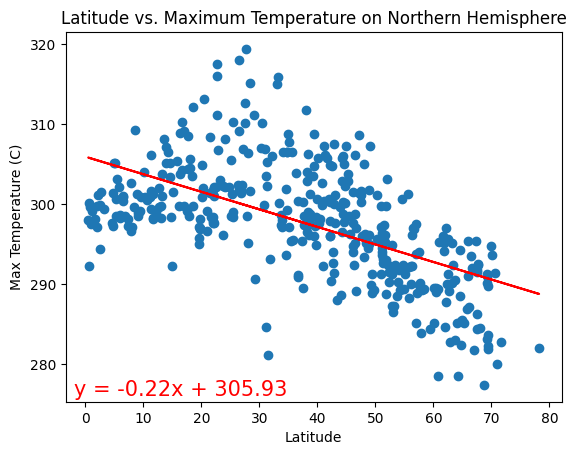

<Figure size 640x480 with 0 Axes>

In [42]:
# Linear regression on Northern Hemisphere

# Define x-values and y-values for the plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function to plot the linear regression
Fig5 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Maximum Temperature on Northern Hemisphere",
                              "Latitude",
                              "Max Temperature (C)",
                              (-2,276))

plt.savefig("output_data/Fig5.png")

The r-value is: 0.8255410410800841


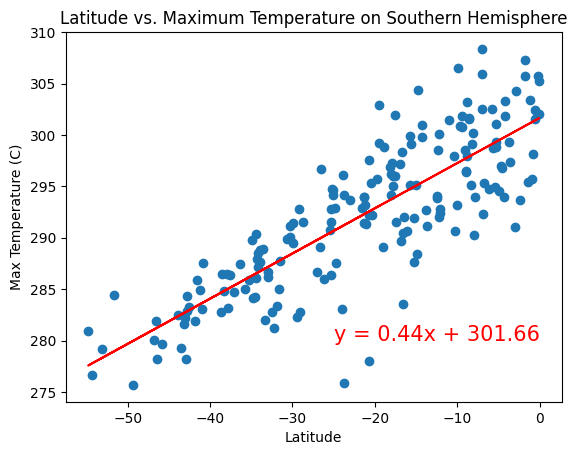

<Figure size 640x480 with 0 Axes>

In [45]:
# Linear regression on Southern Hemisphere
# Define x-values and y-values for the plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function to plot the linear regression
Fig6 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Maximum Temperature on Southern Hemisphere",
                              "Latitude",
                              "Max Temperature (C)",
                              (-25,280))

plt.savefig("output_data/Fig6.png")

**Discussion about the linear relationship:**

- For the Northern Hemisphere, the r-value -0.6089 shows a negative relationship between latitude and max temperature indicating that the closer one becomes to the equator, the max temperature rises as evident on the scatter plot.

- For the Southern Hemisphere, the r-value 0.8560 shows a strong positive relationship between latitude and max temperature indicating a strong decline in temperature the further one moves away from the equator as evident on the scatter plot.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.04600202103735916


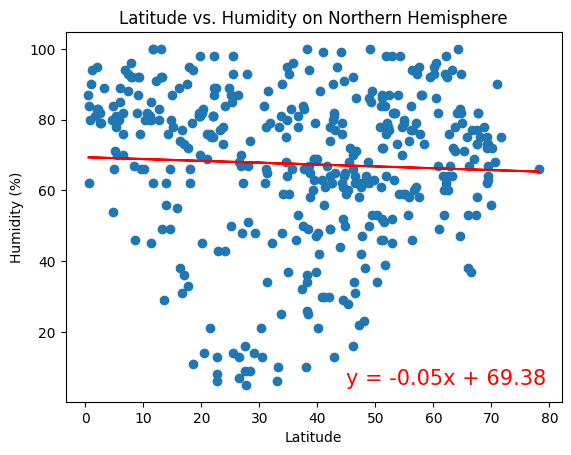

<Figure size 640x480 with 0 Axes>

In [46]:
# Northern Hemisphere
# Define x-values and y-values for the plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function to plot the linear regression
Fig7 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Humidity on Northern Hemisphere",
                              "Latitude",
                              "Humidity (%)",
                              (45,5))

plt.savefig("output_data/Fig7.png")

The r-value is: -0.23764628123322967


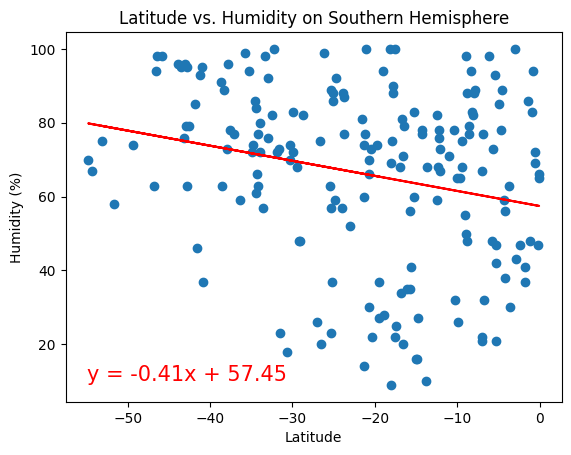

<Figure size 640x480 with 0 Axes>

In [48]:
# Southern Hemisphere
# Define x-values and y-values for the plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function to plot the linear regression
Fig8 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Humidity on Southern Hemisphere",
                              "Latitude",
                              "Humidity (%)",
                              (-55,10))

plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** 

- The r-value 0.0199 shows a low weak relationship between latitude and humidity indicating that humidity is high throughout the northern hemisphere as evident on the scatter plot.

- The r-value -0.0191 shows a low weak relationship between latitude and humidity indicating that humidity that humidity is high throughout the southern hemisphere as evident on the scatter plot.

- For both hemispheres, there is little to no notable change in humidity as one moves away from the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.20338411591348685


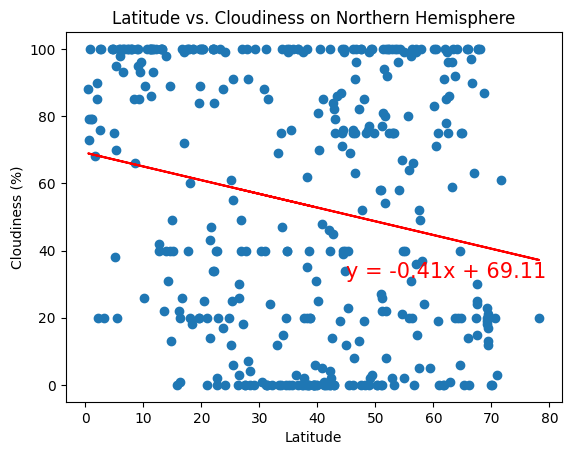

<Figure size 640x480 with 0 Axes>

In [19]:
# Northern Hemisphere
# Define x-values and y-values for the plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function to plot the linear regression
Fig9 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Cloudiness on Northern Hemisphere",
                              "Latitude",
                              "Cloudiness (%)",
                              (45,32))

plt.savefig("output_data/Fig9.png")

The r-value is: -0.07871500874488194


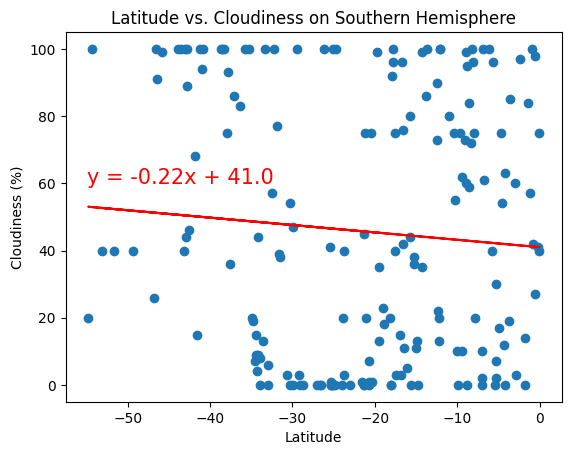

<Figure size 640x480 with 0 Axes>

In [49]:
# Southern Hemisphere
# Define x-values and y-values for the plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function to plot the linear regression
Fig10 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Cloudiness on Southern Hemisphere",
                              "Latitude",
                              "Cloudiness (%)",
                              (-55,60))

plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:** 

- The r-value -0.1741 shows a low weak relationship between latitude and cloudiness indicating little to no notable change in cloudiness throughout the northern hemisphere.

- The r-value 0.1221 shows a low weak relationship between latitude and cloudiness indicating little to no notable change in cloudiness throughout the southern hemisphere. 

- For both hemispheres, cloudiness doesn't not change as one moves away from the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.1632315492001059


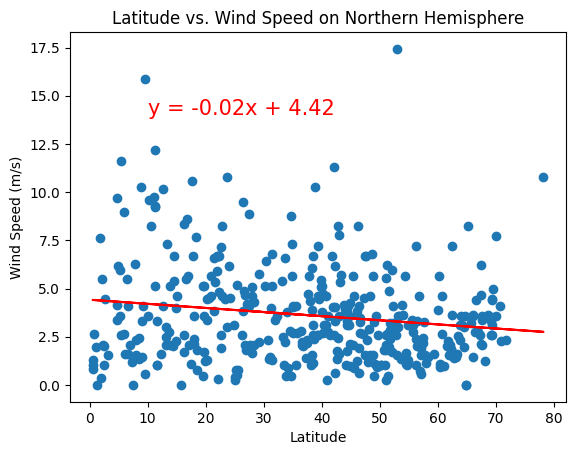

<Figure size 640x480 with 0 Axes>

In [51]:
# Northern Hemisphere
# Define x-values and y-values for the plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function to plot the linear regression
Fig11 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Wind Speed on Northern Hemisphere",
                              "Latitude",
                              "Wind Speed (m/s)",
                              (10,14))

plt.savefig("output_data/Fig11.png")

The r-value is: -0.005109468525380121


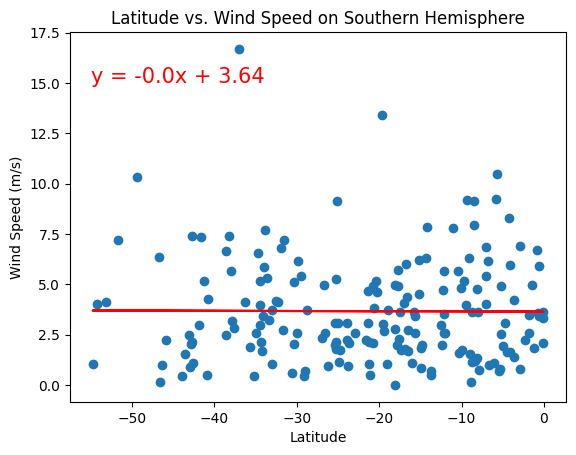

<Figure size 640x480 with 0 Axes>

In [52]:
# Southern Hemisphere
# Define x-values and y-values for the plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function to plot the linear regression
Fig12 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Wind Speed on Southern Hemisphere",
                              "Latitude",
                              "Wind Speed (m/s)",
                              (-55,15))

plt.savefig("output_data/Fig12.png")

**Discussion about the linear relationship:** 

- For the Northern Hemisphere, the r-value -0.1753 shows a low weak relationship between latitude and wind speed indicating that there is no significant change in wind speed as one moves away from the equator.

- For the Southern Hemisphere, the r-value -0.1177 shows a weak relationship between latitude and wind speed indicating that while there is a mild change in wind speed as one moves away from the equator, it is not a notable change. 